# Исследование способов увеличения прибыли

**Описание данных:**

Таблица hypothesis - с данными о гипотезах: 

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Таблица orders - с данными о покупателях:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.


Таблица visitors - с данными о пользователях:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats

In [2]:
try: #серверный путь 
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except: #локальный путь 
    hypothesis = pd.read_csv('C:/Users/User/Desktop/hypothesis.csv')
    orders = pd.read_csv('C:/Users/User/Desktop/orders.csv')
    visitors = pd.read_csv('C:/Users/User/Desktop/visitors.csv')

In [3]:
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице `hypothesis` предаставлены данные о гипотезах:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [4]:
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице `orders` представлены данные о покупателях:

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

В столбце `date`, где указана дата, когда был совершён заказ тип данных не соотвествует содержанию.

In [5]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице `visitors` представлены данные о группах тестирования:

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

В столбце `date`, где указана дата - тип данных так же не соотвествует содержанию.

### Выводы:

1. В таблицах `orders`  и `visitors`  в столбцах date тип данных не соотвествует содержанию.
2. В данных нет пропусков

## Предобработка данных

Изменим тип данных в таблицах `orders`  и `visitors`, в столбцах date.

In [6]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
#получаем user id пользователей, котоые попали в обе группы теста 
filt = orders.groupby('visitorId').agg({ 'group' : 'nunique'}).query('group == 2').reset_index()['visitorId']
filt.head()

0      8300375
1    199603092
2    232979603
3    237748145
4    276558944
Name: visitorId, dtype: int64

Посмотрим сколько пользователей попали в обе группы:

In [9]:
len(filt)

58

Таким образом, в обе группы попали 58 пользователей. Удалим их, что  бы не искажать результаты исследования.

In [10]:
# удаление пользователей попавших в обе группы
orders = orders.query('visitorId not in @filt')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


Получаем таблицу с пользователями, которые попали только в одну группу.

### Выводы: 

1. Тип данных в таблицах `orders`  и `visitors`, в столбцах date изменен  с `object` на `datetime`. 
2. Удалили пользователей, котрые попали в обе группы

## Исследовательский анализ

### Приоритезация гипотез по ICE

Ознакомимся с таблицей `hypothesis`, где указаны данные о гипотезах.

In [11]:
pd.set_option("max_colwidth", 120) #для полного отображения гипотез
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице представлено всего 9 гипотез. Проверка гипотез дорогостоящий, трудоемкий и времязатратный процесс. В связи с чем, определим приоритет гипотез, то есть проведем приоритизацию гипотез по формуле ICE, RICE. 

Обратим внимание, что провести приоритезацию по шкале WSJF не представляется возможным, так как приоритет по  WSJF - это отношение цены промедления к длительности работы, а данных по длительности работы нет.

In [12]:
#приоритизация по ICE
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'] 
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По таблице видно, что гипотезы 9,1,8,7,3 наиболее перспективные.     

### Приоритизация гипотез  по RICE

Проведем приоритизацию гипотез по RICE:

In [13]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000


In [14]:
# приоритизация по RICE
pd.set_option("max_colwidth", 120) #для полного отображения гипотез
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)


,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По таблице видно, что гипотезы 8,3,1,7,9 - наиболее приоритетные.

Объеденим результаты приоритезации по шкале ICE и RICE в одной таблице, так же добавим содержание гипотез:

In [15]:
hypothesis = hypothesis[['Hypothesis', 'ICE','RICE']].sort_values(by=['ICE', 'RICE'], ascending=False)
hypothesis.head()

,Hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0


In [16]:
 hypothesis.style.background_gradient(cmap='Blues') #окрашиваение ячеек

,Hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


### Выводы:

1. По шкале ICE - наиболее перспективные гипотезы: 9,1,8,7,3

2. По шкале RICE - наиболее перспективные гипотезы: 8,3,1,7,9


Наиболее перспективные гипотезы по обеим шкалам совпадают, но на первом месте по шкале RICE уже гипотеза 8, так как параметр `reach`, который показывает скольких пользователей затронет изменение, которое мы хотим внести, у этой гипотезы = 10. 

То есть в данной шкале мы учитываем и силу гипотезы, и то скольких пользователей эти изменения коснуться (эта гипотеза коснется).

Таким образом, наиболее перспективными гипотезами для увеличения прибыли являются следующие (приоритет указан по шкале RICE): 

8. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
3. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
7. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
9. Запустить акцию, дающую скидку на товар в день рождения	

Соотвественно, проверять необходимо данные гипотезы.

## Анализ результатов 

Был проведен А/Б тест и нам были переданы результаты.Ознакомимся с данными таблиц :
* orders - с данными о покупках
* visitors - с данными о посетителях

In [17]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [18]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В таблице представлены данные по группам и датам
Сгруппируем данные по датам и расчитаем кумулятивную выручку по группам.

### Расчет кумулятивной выручки по группам

Создадим датафрейм с уникальными датами и группами, чтобы в дальнейшем проводить расчеты и анализировать  данные по этим уникальным дням и уникальным группам:

In [19]:
orders_group = orders[['date','group']].drop_duplicates() #удаляем дубликаты
orders_group.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Получили таблицу, в которой указана уникальнаые даты покупок и названия групп покупателей.

Далее расчитаем кумулятивную выручку по уникальным датам и по уникальным группам. Для этого:
* получеам из таблицы `orders` элементы строк, где дата и группа равны дате и группе из нашей таблицы `df_group` (что бы расчет проходил именно ежедневно и по группам)
* далее подсчитываем уникальное количество покупателей (по visitorId) и уникальное количество заказов (по transactionId), а так же сумму покупок за эти дни
* это методы применяем к каждой строчке и сортируем данные по дате и группе 

In [20]:
#расчитываем кумулятивную выручку по дням и группам
orders_aggregated = (
    orders_group
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])  
)
orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Таким образом, мы получили таблицу по датам и группам с:
* кумулятивным количеством заказов (transactionId)
* кумулятивным количеством покупателей (visitorId) 
* кумулятивной  выручкой (revenue)

Далее вспомним таблицу `visitors`.

In [21]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Так же, как и ранее, создадим таблицу с уникальными датами и уникальными группами посетителей

In [22]:
visitors_group = visitors[['date', 'group']].drop_duplicates()
visitors_group.head()

,date,group
0,2019-08-01,A
1,2019-08-02,A
2,2019-08-03,A
3,2019-08-04,A
4,2019-08-05,A


Получаем таблицу с уникальными датами посещений и группами посетителей.

Далее, посчитаем кумулятивное количество пользователей по датам и группам:

In [23]:
#расчитываем кумулятвиное количество посльзователей по датам и группам
visitors_aggregated = (
    visitors_group
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))
visitors_aggregated.head()

,date,group,visitors
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,1338
32,2019-08-02,B,1294
2,2019-08-03,A,1845


Таким образом, получаем таблицу скумулятивным количеством посетителей в эту дату и в этой группе.

Далее объеденим таблицы с кумулятивной выручкой и кумулятивным количеством посетителей.

In [24]:
cumulative = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


 Переименуем столбцы так, что бы они отражали свое содержание:

In [25]:
cumulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


#### Выводы:

Таким образом, в таблице `cumulative` содержатся следующие данные:
* date - дата посещения и/ или покупки
* group - группа теста 
* orders - кумулятвиное колчиество заказов 
* buyers - кумулятивное количество покупателей 
* revenue - кумулятивная выручка
* visitors - кумулятивное количество пользователей 

### График кумулятивной выручки по группам

Выделим данные по группам и кумулятивной выручке этих групп в отдельные переменные, что бы построить графики по группам

In [26]:
#выделяем данные по группе А методом query (знаком)
cumulative_revenueA = cumulative.query('group == "A"')[['date', 'revenue', 'orders']]
cumulative_revenueA.head()       

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


In [27]:
#выделяем данные по группе В новым методом из теории
cumulative_revenueB = cumulative[cumulative['group'] == 'B'][['date', 'revenue', 'orders']]
cumulative_revenueB.head()

,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


Построим графики по кумулятивной выручке и по группам

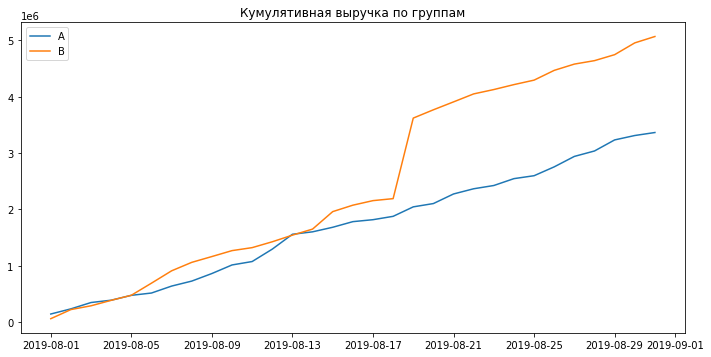

In [28]:
fig = plt.figure(figsize=(10,5)) #задаем размер фигуры, что бы даты не наслаивались 
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A') #строим график 
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B') #строим график 
fig.tight_layout() #подгоняем и убираем наслоения на графике 
plt.title('Кумулятивная выручка по группам')
plt.legend();

#### Выводы: 

По графику видно, что кумулятивная выручка растет-это хорошо. 
Кумулятивная выручка в обеих группах в начале теста не отличалась, однако затем примерно на 5 день  кумулятивная выручка группы В увеличилась.

Далее примерно на 14 день кумулятивная выручка по обеим группам уровнялась, а с 14 дня отмечается резкий скачок выручки в группе В и далее группа В лидировала по кумулятвиной выручке до конца теста.

Возможно, имели место аномально большие суммы заказаов или большое количество заказаов (то есть аномалии). Посмотрим на график кумулятивного среднего чека.

### График кумулятивного среднего чека по группам

Построим график кумулятивного среднего чека. Для этого кумулятивную сумму разделим на кумулятивное количество заказов:

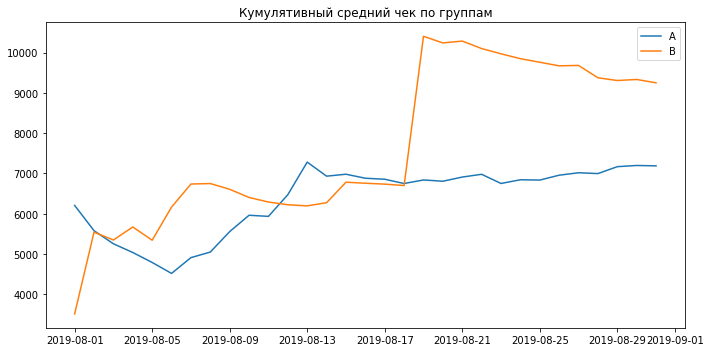

In [29]:
#строим графики кумулятивного среднего чека
fig = plt.figure(figsize=(10,5)) 
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['orders'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
fig.tight_layout() 
plt.legend();

#### Выводы:

По графику видно, что примерно после 17 августа есть резкий скачек размера кумулятивного среднего чек. В целом, по графику видно, что кумулятивный средний чек пот группам продолжает колебаться.

Это так же говорит в пользу аномально больших значений кумулятивной выручки, попавших в группу В и исказивших результаты.


Необходим анализ выбросов, которые так исказили результаты. 

## График относительного изменения кумулятивного среднего чека группы B к группе A

Что бы построить график относительного изменения кумулятивного среднего чека - объеденим обе таблицы с данным по  кумулятивной выручке по группе А и по группе В по столбцу date.

In [30]:
cumulative_revenueA.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


In [31]:
cumulative_revenueB.head()

,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


In [32]:
cumulative_revenue = cumulative_revenueA.merge(cumulative_revenueB, 
                                               left_on='date', 
                                               right_on='date',
                                               how='left', 
                                               suffixes=['A', 'B'])
cumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


Таким образом, получаем таблицу, в которой указаны:
* date-дата 
* revenueA-кумулятивная выручка по группе А 
* ordersA-кумулятивное количество заказов по группе А
* revenueB-кумулятивная выручка по группе В 
* ordersB-кумулятивное количество заказаов по группе В
    

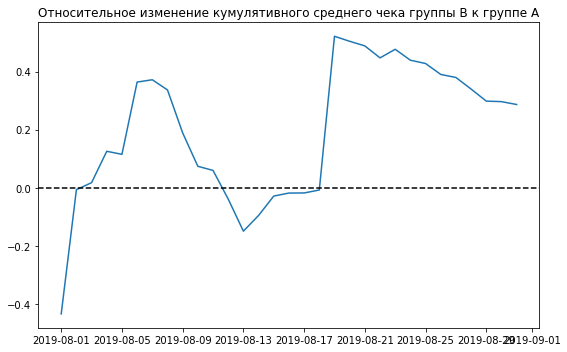

In [33]:
#строим график относительного изменение кумулятивного среднего чека группы B к группе A

fig = plt.figure(figsize=(8,5)) 
plt.plot(cumulative_revenue['date'], 
         (cumulative_revenue['revenueB']/cumulative_revenue['ordersB'])/
         (cumulative_revenue['revenueA']/cumulative_revenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--') #добавляем горизонтальную линию, ось Х
fig.tight_layout();

#### Вывод: 

По графику видно, что кумулятивный средний чек резко увеличивается в определенные дни. Вероятнее всего, в эти дни были сделаны крупные заказы. Необходимо проверить данные на аномалии и выбросы.

## График кумулятивной конверсии по группам


Построим график кумулятивной конверсии по группам. Для этого разделим количество заказов на количество посетителей.

In [34]:
cumulative['conversion'] = cumulative['orders']/cumulative['visitors']
cumulative.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


Расчет кумулятивной конверсии произведен. Далее сохраним данные по каждой группе в отлельную переменную, для построения графика по каждой группе

In [35]:
# кумулятивная конверсия по группе A
cumulative_conversionA = cumulative[cumulative['group']=='A']

# кумулятивная конверсия по группе B
cumulative_conversionB = cumulative[cumulative['group']=='B']

Получим минимальную и максимальную даты, что бы передать необходимый интервал по оси х:

In [36]:
display(orders['date'].min())
orders['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [37]:
display(visitors['date'].min())
visitors['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Таким образом, необходимый интервал с 01.08.2019 по 31.08.2019

Построим график по кумулятивной конверсии группю Отметим, что будем задавать масштаб осей х и у самостоятельно.

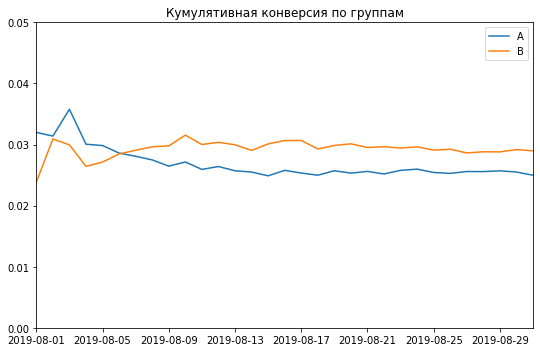

In [38]:
fig = plt.figure(figsize=(8,5)) 

plt.plot(cumulative_conversionA['date'], cumulative_conversionA['conversion'], label='A')
plt.plot(cumulative_conversionB['date'], cumulative_conversionB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам')
fig.tight_layout()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]) #задаем масштаб осей 
plt.legend();

#### Выводы:


По графику видно, что в начале теста у группы А конверсия была больше конверсии группы В, но затем конверсия группы А упала и зафиксировалась, (примерно 4-5 августа), а конверсия группы В  возросла и зафиксировалась.

Возможно, в группе В есть аномально большие заказы или очень большие заказы(по количеству).

## График относительного изменения кумулятивной конверсии группы B к группе A

Соеденим таблицы с кумулятивной конверсией, что бы построить график относительной конвесрии по группам.

In [39]:
cumulative_conversion = (cumulative_conversionA[['date','conversion']]
    .merge(cumulative_conversionB[['date','conversion']], 
           left_on='date', 
           right_on='date', 
           how='left',  
           suffixes=['A', 'B']))

cumulative_conversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


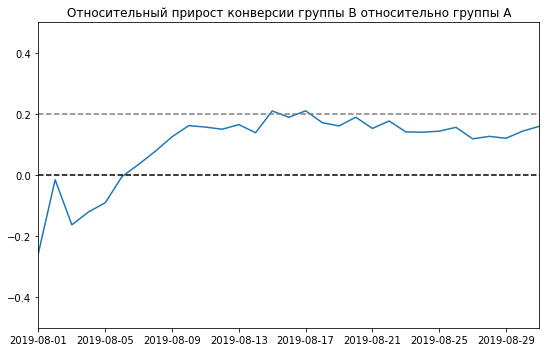

In [40]:
fig = plt.figure(figsize=(8,5)) 

plt.plot(cumulative_conversion['date'], cumulative_conversion['conversionB']/cumulative_conversion['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
fig.tight_layout()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5]);


#### Выводы:

По графику видно, что:
* в начале теста группа В проигрывала группе А
* затем группа В вырвалась вперед и ее конверсия росла
* в середине теста конверсия группы В снижается и до конца теста фиксируется на одном уровне (примерно 10 %)

В целом отношение конверсии ещё не установилось (в конце заметен небольшой рост), поэтому делать выводы по тесту нельзя. Сначала проанализируем аномалии,т.к. возможно, они изменят картину.

## Гистограмма количества заказов

In [41]:
orders_count = (
    orders
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
    .sort_values(by='transactionId', ascending=False))
orders_count.head(10)

,visitorId,transactionId
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


По таблице видно, что у есть количество заказов -11, если они попадут в группу к заказам 1-2, то это скажется на результате. Построим гистрограмму, что бы оценить - какое количество заказов встречается чаще всего.

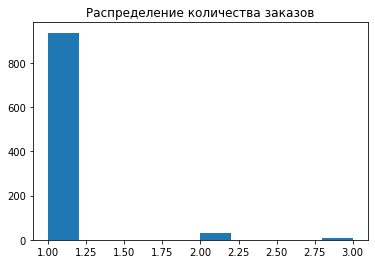

In [42]:
plt.hist(orders_count['transactionId'])
plt.title('Распределение количества заказов');

#### Выводы:

По графику видно, что чаще всего количество заказов - 1, так же встречается количество заказов: 2 и 3. 

Построим точечный график количества заказов.

## Точечный график количества заказов по пользователям

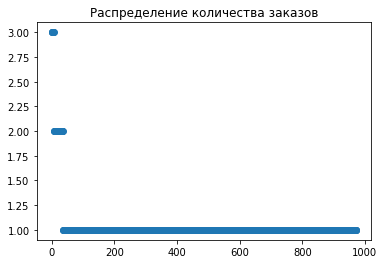

In [43]:
#создаем значения по оси x, количество значений на графике = количеству значений в столбце 
x_values = pd.Series(range(0,len(orders_count['transactionId'])))
plt.scatter(x_values, orders_count['transactionId'])
plt.title('Распределение количества заказов');

#### Выводы:

Наиболее частое количество заказов - 1.Как мы и предполагали ранее, есть количество заказов и большое 2 и 3.
Расчитаем 90, 95 и 99 перцентили количества заказов. 

## Перцентили количества заказов на пользователя

Расчитаем 90, 95-й и 99-й перцентили количества заказов на пользователя и выберемем границу для определения аномальных пользователей.

In [44]:
#расчитываем 90,95, 99 перцентили
percent_order90 = np.percentile(orders_count['transactionId'], [90]) 
percent_order95 = np.percentile(orders_count['transactionId'], [95]) 
percent_order99 = np.percentile(orders_count['transactionId'], [99]) 

display(f'90 Перцентиль количества заказов:{percent_order90}')
display(f'95 Перцентиль количества заказов:{percent_order95}')
display(f'99 Перцентиль количества заказов:{percent_order99}')

'90 Перцентиль количества заказов:[1.]'

'95 Перцентиль количества заказов:[1.]'

'99 Перцентиль количества заказов:[2.]'

#### Выводы:

Мы выяснили, что:
* у 90 % пользователей - количество заказов 1, 
* у 95 % пользователей - количество заказов 1,
* у 99% пользователей - количество заказов 2

Таким образом, количество заказов более 1 - будем считать выбросами.

## Гистограмма выручки

In [45]:
orders.head(10).sort_values(by='revenue', ascending=False) #сортируем выручку в порядке возрастания

,transactionId,visitorId,date,revenue,group
8,1576988021,295230930,2019-08-15,13710,A
3,3797467345,1196621759,2019-08-15,9759,B
10,3649131742,879864040,2019-08-15,4008,A
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
9,1506739906,1882260405,2019-08-15,1855,B
0,3667963787,3312258926,2019-08-15,1650,B
7,2626614568,78758296,2019-08-15,1044,A
1,2804400009,3642806036,2019-08-15,730,B


Среди первых 10 строк цены заказов находятся в диапазоне от 400 до 4008 рублей. Кроме двух заказов, сумма которых составила целых 13710 и 9759 рубля!

Если такие дорогие заказы попадут в одну из групп теста, эти заказы сразу же исказят результаты и сделают победителем ту группу, где оказались. 

При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно.
Такие аномально дорогие заказы следует удалять из теста. 

Изучим гистограмму распределения стоимостей заказов:


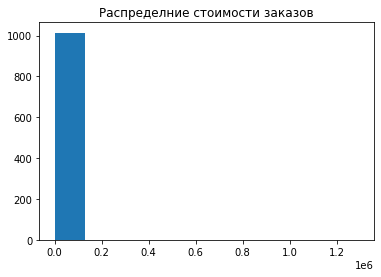

In [46]:
plt.hist(orders['revenue'])
plt.title('Распределние стоимости заказов');

#### Выводы: 

По графику видно, что стоимость большинства заказов - до 100.000 руб.
Посмотрим на стоимость заказов на точнечном графике.

## Точечный график стоимостей заказов

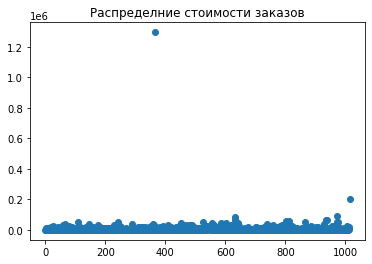

In [47]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределние стоимости заказов');

#### Выводы:

По графику видно, что стоимость заказов чаще всего до 50.000 тыс. Однако есть заказы с аномльно большой стоимостью-около 200 тыс руб и больше 1 млн руб.

Вычислим 90,95 и 99 перцентили заказов, что бы отбросить все аномальные значения.

## Перцентили стоимости заказов

Расчитаем 90, 95-й и 99-й перцентили стоимости заказов, что бы выбрать границу для определения аномальных заказов.

In [48]:
#расчитываем 90,95, 99 перцентили
percent_reven90 = np.percentile(orders['revenue'], [90]) 
percent_reven95 = np.percentile(orders['revenue'], [95]) 
percent_reven99 = np.percentile(orders['revenue'], [99]) 

display(f'90 Перцентиль количества заказов:{percent_reven90}')
display(f'95 Перцентиль количества заказов:{percent_reven95}')
display(f'99 Перцентиль количества заказов:{percent_reven99}')

'90 Перцентиль количества заказов:[17990.]'

'95 Перцентиль количества заказов:[26785.]'

'99 Перцентиль количества заказов:[53904.]'

#### Выводы:

Мы выяснили, что:
* у 90 % пользователей - стоимость заказов до 17.990 тыс, 
* у 95 % пользователей - стоимость заказов до 26.785 тыс,
* у 99% пользователей - стоимость заказов до 53.904 тыс.

Таким образом, стоимость заказов более 26.785 тыс - будем считать выбросами.

## Статистическая значимость различий в конверсии между группами по «сырым» данным

Расчитаем статистическую значимость различия в кноверсии между группами А и В по "сырым" данным (то есть без удаления аномальных значений). 

Сформулируем гипотезу:
* нулевая гипотеза: различий в конверсии между группами А и В нет
* альтернативная гипотеза: различия в конверсии между группами А и В есть

In [49]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Выделим количество посетителей группы А по дням и сохраним в отдельной переменной:

In [50]:
#сохраняем количество посетителей за день для группы А
visitors_dailyA = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_dailyA.columns = ['date', 'visitors_per_dateA']
visitors_dailyA.head()

,date,visitors_per_dateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Расчитаем кумулятивное количество посетителей по дням для группы А и сохраним в новой переменной:

In [51]:
#расчитываем кумулятивное количество пользователей дря группы А
visitors_cummulativeA = (
    visitors_dailyA
    .apply(lambda x: visitors_dailyA[visitors_dailyA['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_dateA': 'sum'}), axis=1))
visitors_cummulativeA.columns = ['date', 'visitors_cummulativeA']
visitors_cummulativeA.head()

,date,visitors_cummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Сохраним в новой переменной количество посетителей за день для группы В и расчитаем кумулятивное количество пользователей за день для группы В:

In [52]:
#расчет количества посетителей за день для группы В
visitors_dailyB = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_dailyB.columns = ['date', 'visitors_per_dateB']
display(visitors_dailyB.head())

#расчитываем кумулятивное количество пользователей для группы В
visitors_cummulativeB = (
    visitors_dailyB
    .apply(lambda x: visitors_dailyB[visitors_dailyB['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_dateB': 'sum'}), axis=1))
visitors_cummulativeB.columns = ['date', 'visitors_cummulativeB']
visitors_cummulativeB.head()

,date,visitors_per_dateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


,date,visitors_cummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Вспоним таблицу с данными о заказах:

In [53]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


Расчитаем количество заказов и сумму заказов за день для группы А:

In [54]:
#количество заказов и сумма заказов по дням для группы А
orders_dailyA = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
orders_dailyA.columns = ['date', 'orders_per_dateA', 'revenue_per_dateA']

orders_dailyA.head()

,date,orders_per_dateA,revenue_per_dateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


Расчитаем кумулятивное количество заказов и кумулятивную сумму заказов по дням для группы А:

In [55]:
#кумулятивное количество заказов и кумулятивная сумма заказов по дням для группы А

orders_cummulativeA = (
    orders_dailyA
    .apply(lambda x: orders_dailyA[orders_dailyA['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_dateA': 'sum', 'revenue_per_dateA': 'sum'}),axis=1)
    .sort_values(by=['date']))
    
orders_cummulativeA.columns = [
    'date',
    'orders_cummulativeA',
    'revenue_cummulativeA',
]

orders_cummulativeA.head()

,date,orders_cummulativeA,revenue_cummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


Расчитаем количество заказов и сумму заказов за день для группы В, и вычислим кумулятивное количество заказов и кумулятивную сумму заказов по дням для группы В:

In [56]:
#количество заказов и сумма заказов по дням для группы B

orders_dailyB = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_dailyB.columns = ['date', 'orders_per_dateB', 'revenue_per_dateB']
orders_dailyB.head()

,date,orders_per_dateB,revenue_per_dateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [57]:
#кумулятивное количество заказов и кумулятивная сумма заказов по дням для группы B

orders_cummulativeB = (
    orders_dailyB
    .apply(lambda x: orders_dailyB[orders_dailyB['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_dateB': 'sum', 'revenue_per_dateB': 'sum'}),axis=1)
    .sort_values(by=['date']))
    
orders_cummulativeB.columns = [
    'date',
    'orders_cummulativeB',
    'revenue_cummulativeB',
]
    
orders_cummulativeB.head()

,date,orders_cummulativeB,revenue_cummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


Объеденим полученные таблицы:

In [58]:
data = (orders_dailyA
    .merge(orders_dailyB, on='date')
    .merge(orders_cummulativeA, on='date')
    .merge(orders_cummulativeB, on='date')
    .merge(visitors_dailyA, on='date')
    .merge(visitors_dailyB,on='date')
    .merge(visitors_cummulativeA, on='date')
    .merge(visitors_cummulativeB, on='date')
)

data.head(5)


,date,orders_per_dateA,revenue_per_dateA,orders_per_dateB,revenue_per_dateB,orders_cummulativeA,revenue_cummulativeA,orders_cummulativeB,revenue_cummulativeB,visitors_per_dateA,visitors_per_dateB,visitors_cummulativeA,visitors_cummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Таким образом, получаем таблицу, где указаны:

* date — дата;
* orders_per_dateA — количество заказов в выбранную дату в группе A;
* revenue_per_dateA — суммарная выручка в выбранную дату в группе A;
* orders_per_dateB — количество заказов в выбранную дату в группе B;
* revenue_per_dateB — суммарная выручка в выбранную дату в группе B;
* orders_cummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenue_cummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* orders_cummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenue_cummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitors_per_dateA — количество пользователей в выбранную дату в группе A;
* visitors_per_dateB — количество пользователей в выбранную дату в группе B;
* visitors_cummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitors_cummulativeB — количество пользователей до выбранной даты включительно в группе B.

Расчитаем количество заказов для уникальных пользователей в группах, то есть сколько заказов сделал каждый пользователь в каждой группе.

In [59]:
#расчитываем количество заказов для уникальных пользователей для группы А
orders_by_usersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))

orders_by_usersA.columns = ['visitorId', 'orders']
orders_by_usersA.head()

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [60]:
#расчитываем количество заказов для уникальных пользователей для группы В

orders_by_usersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_usersB.columns = ['visitorId', 'orders'] 
orders_by_usersB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Сформируем таблицы-для группы А и В , где:
* пользователям, которые совершили 1 и более покупки-будет присвоено количество совершенных покупок,
* пользователям, которые не соврешили ни одно йпокупки-будет присвоен 0.

In [61]:
#таблица для группы А
sampleA = pd.concat(
    [orders_by_usersA['orders'], 
    pd.Series
     (0, index=np.arange(data['visitors_per_dateA'].sum() - len(orders_by_usersA['orders'])), 
      name='orders')], axis=0)
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [62]:
#таблица для группы В

sampleB = pd.concat(
    [orders_by_usersB['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_dateB'].sum() - len(orders_by_usersB['orders'])),
    name='orders')], axis=0)
sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Расчитаем статистическую значимость различия конверсии по результатам теста с помощью тест Манна-Уитни.
Так, мы получим p-value для сравнения конверсии между группами. Округлим p-value до 3 знаков после запятой.

In [63]:
'Значение p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1])

'Значение p-value: 0.011'

#### Выводы:

* Значение p-value = 0.011, это меньше 0.05. 

* Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. 

Таким образом мы выявили, что есть статистически значимая разница в конверсии между группами по сырым данным.

## Относительное различие конверсии между группами по "сырым" данным

Вычислим относительное различие в конверсии между группами по "сырым" данным.

In [64]:
('Относительное различие конверсии между группами: {0:.3f}'
      .format((data['orders_per_dateB'].sum()/
               data['visitors_per_dateB'].sum())/
              (data['orders_per_dateA'].sum()/data['visitors_per_dateA'].sum())-1))


'Относительное различие конверсии между группами: 0.160'

#### Выводы:

Относительый прирост конверсии группы В к конверсии группы А равен 16 %. 

Таким образом,это подтвержает выявленный ранее результат, о том что есть статистически значимая разница в конверсии между группами по сырым данным.

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между группами. Тогда:

* нулевая гипотеза: различий в среднем чеке между группами нет
* альтернативная гипотеза: различия в среднем чеке между группами есть

Отметим, что мы передадим критерию `mannwhitneyu` данные о выручке с заказов по группам

In [65]:
('Значение p-value:{0:.3f}'.format(stats
    .mannwhitneyu(orders[orders['group']=='A']['revenue'], #"выборка 1" выручка с заказов в группе А
    orders[orders['group']=='B']['revenue'])[1])) #"выборка 2" выручка с заказов в группе В

'Значение p-value:0.829'

#### Выводы:

* Значение p-value = 0.829 (это больше 0.05)

* Значит, нулевую гипотезу о том, что статистически значимых  различий в среднем чеке между группами нет - не отвергаем. 

Таким образом мы выявили, что нет статистически значимой разницы в среднем чеке между группами по сырым данным.

## Относительный прирост среднего чека между группами по "сырым" данным

Расчитаем относительный прирост среднего чека группы B к среднему чеку группы А:

In [66]:
('Относительный прирост среднего чека:{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/
    orders[orders['group']=='A']['revenue'].mean()-1))

'Относительный прирост среднего чека:0.287'

#### Выводы:

*  относительный прирост среднего чека группы B к среднему чеку группы А - 0.287, то есть 28,7 % 

Таким образом мы выявили, что средней чек группы В больше среднего чека группы А на 28 % по сырым данным. Согласно тесту со статистической значимостью различий в среднем чеке нет, соотвественно данная разница статистически не значима.


## "Очищенные данные"

Напомним, что ранее мы нашли 95-й и 99-й перцентили стоимости заказов:
* 95 перцентиль стоимости заказов - 26.785 руб.
* 99 перцентиль стоимости заказов - 53.904 руб. 

Так же, нашли 95 и 99 перцентили количества заказов: 
* 95-й перцентиль количества заказов на одного пользователя-1
* 99-й перцентиль количества заказов на одного пользователя-2

Тоггда, примем за аномальных пользователей тех, кто совершил более 1 заказов, или совершил заказ дороже 26.785 рублей. 

Так мы уберём 5% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 1, и пользователей, совершивших заказы дороже 26.785 руб.


In [67]:
#срез пользователей с количеством заказов  больше 1
users_many_orders = pd.concat(
    [orders_by_usersA[orders_by_usersA['orders'] > 1]['visitorId'],
     orders_by_usersB[orders_by_usersB['orders'] > 1]['visitorId']], axis=0)
users_many_orders.head()

36      366673373
58      611059232
64      678354126
72      759473111
171    1617417821
Name: visitorId, dtype: int64

In [68]:
#срез пользователей с стоимостью заказов 
revenue_lim = np.percentile(orders['revenue'], 95)
users__expensive_orders = orders[orders['revenue'] > revenue_lim]['visitorId']
users__expensive_orders.head()

73     2947100995
77      787824685
78     3288820196
131    2254586615
137    1211585711
Name: visitorId, dtype: int64

Объединим эти два среза в таблице normal_users.

In [69]:
normal_users = (
    pd.concat([users_many_orders, users__expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values())

normal_users.head()

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64

## Статистическую значимость различий в конверсии между группами по «очищенным» данным

Посмотрим, как действия аномальных пользователей повлияли на результаты теста. 

Вспомним наши гипотезы:

* нулевая гипотеза: различий в конверсии между группами нет
* альтернативная гипотеза: различия в конверсии между группами есть

Результаты, полученные ранее по сырым данным:
* мы выявили, что есть статистически значимая разница в конверсии между группами по сырым данным (то есть отвергли нулевую гипотезу)

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Но сначала подготовим выборки количества заказов по пользователям по группам теста:

In [70]:
#выборка количества заказов по пользователям в группе А
sample_filteredA = pd.concat(
    [orders_by_usersA[np.logical_not(orders_by_usersA['visitorId'].isin(normal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_dateA'].sum() - len(orders_by_usersA['orders'])),
    name='orders')], axis=0)
sample_filteredA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [71]:
#выборка количества заказов по пользователям в группе А

sample_filteredB = pd.concat(
    [orders_by_usersB[np.logical_not(orders_by_usersB['visitorId'].isin(normal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_dateB'].sum() - len(orders_by_usersB['orders'])),
    name='orders')],axis=0)
sample_filteredB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Таким образом, в переменных `sample_filteredA` и `sample_filteredB` сохраним очищенные данные о заказах — не включая аномальных пользователей.

Далее, получим p-value для сравнения конверсии между очищенными группами, округлим p-value до трех знаков после запятой.

In [72]:
'Значение p-value: {0:.3f}'.format(stats.mannwhitneyu(sample_filteredA, sample_filteredB)[1])

'Значение p-value: 0.016'

#### Выводы:

* Значение p-value = 0.016, это меньше 0.05. 

* Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами А и В нет - отвергаем. 

Мы выявили, что есть статистически значимая разница в конверсии между группами А и В по очищенным данным.

Результат по "очищенным" данным совпадает с результатом по "сырым" данным. 

## Относительное различие конверсии между группами по "очищенным" данным

Вычислим относительное различие в конверсии между группами по "очищенным" данным.

In [73]:
'Относительное различие в конверсии между группами: {0:.3f}'.format(sample_filteredB.mean()/sample_filteredA.mean()-1)

'Относительное различие в конверсии между группами: 0.174'

#### Выводы:

Относительый прирост конверсии группы В к конверсии группы А увеличился и стал 17,4 % (был равен 16 %)

Таким образом,это подтвержает выявленный ранее результат, о том что есть статистически значимая разница в конверсии между группами по сырым данным.

## Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Вычислим статистическую значимость различия средних чеков после удаления аномальных пользователей.


Вспомним наши гипотезы:
* нулевая гипотеза: различий в среднем чеке между группами нет
* альтернативная гипотеза: различия в среднем чеке между группами есть

Результаты, полученные ранее по сырым данным:

* мы выявили, что нет статистически значимой разницы в среднем чеке между группами по сырым данным.

In [74]:
('Значение p-value: {0:.3f}'
     .format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                np.logical_not(orders['visitorId']
                                .isin(normal_users)))]['revenue'],
                                orders[np.logical_and(orders['group'] == 'B',
                                np.logical_not(orders['visitorId']
                                .isin(normal_users)))]['revenue'])[1]))


'Значение p-value: 0.727'

#### Выводы:

* Значение p-value = 0.727, это больше 0.05 (по сырым данным - p-value:0.829). То есть P-value увеличился

* Значит, нулевую гипотезу о том, что статистически значимых  различий в среднем чеке между группами нет - не отвергаем. 

Таким образом мы выявили, что нет статистически значимой разницы в среднем чеке между группами по "очищенным" данным.

## Относительный прирост среднего чека между группами по "очищенным" данным

Вспомним, что ранее мы выяснили по "сырым" данным:
* относительный прирост среднего чека группы B к среднему чеку группы А - 0.287, то есть 28,7 % 

Таким образом мы выявили, что средней чек группы В больше среднего чека группы А на 28,7 % по сырым данным, но согласно тесту со статистической значимостью по сырым данным - различий в среднем чеке нет, соотвественно данная разница статистически не значима. 

Вычислим относительный прирост среднего чека между группами по "очищенным" данным:

In [75]:
('Относительный прирост среднего чека между группами: {0:.3f}'.format(
    orders[np.logical_and(orders['group'] == 'B',
    np.logical_not(orders['visitorId'].isin(normal_users)))]['revenue'].mean() / 
    orders[np.logical_and(orders['group'] == 'A', 
    np.logical_not(orders['visitorId'].isin(normal_users)))]['revenue'].mean() - 1))

'Относительный прирост среднего чека между группами: -0.034'

#### Выводы:

*  относительный прирост среднего чека по очещенным данным - (-0.034), то есть 3,4 % 

Таким образом мы выявили, что средней чек группы В больше среднего чека группы А на 3,4 % по "очищенным" данным.
То есть данное различие в среднем чеке между группами - статистически не значимое.

Разница между сегментами сократилась с 25 % до 3,4 %.


## Решение по результатам теста

При анализе результатов А/В теста мы выяснили, что:

1. Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
* конверсия группы В выше, чем конверсия группы А (прирост конверсии в группе В примерно на 17,4 % больше,чем в группе А)

2. Нет статистически значимого различия по среднему чеку между группами  по «очищенным» данным
* средний чек группы В на 3,4 % больше среднего чека группы А, что статистически не значимая разница

3. График различия кумулятивной конверсии между группами сообщает, что результаты группы B лучше группы A: в целом, конверсия группы В выше, чем у группы В (но в середине теста конверсия группы В снижается на 10 %, и до конца теста фиксируется на одном уровне примерно 10 %)

4. График различия кумулятивного среднего чека колеблется: резко увеличивается в определенные дни. Этот график позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя

Таким образом, на основе вышеизложенного - остановим тест и зафиксируем победу группы В:
* так как конверсия группы В лучше конверсии группы А
* средние чеки групп не имеют статистически значимых различий